In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# 데이터 로드 (예시: melbourne_data.csv)
df = pd.read_csv('/data/ephemeral/home/Jungyeon/level4-cv-finalproject-hackathon-cv-02-lv3/AutoML/data/melb_split.csv')

# Z-score로 이상치 확인
z_scores_price = np.abs(stats.zscore(df['price']))
z_scores_area = np.abs(stats.zscore(df['buildingArea']))

# Z-score가 3 이상인 값은 이상치로 간주
price_outliers = df[z_scores_price > 3]
area_outliers = df[z_scores_area > 3]

print("Price 이상치:\n", price_outliers)
print("BuildingArea 이상치:\n", area_outliers)

# # 이상치 제거
# df_cleaned = df[(z_scores_price <= 3) & (z_scores_area <= 3)]

# # IQR 방법을 사용할 경우
# Q1_price = df['price'].quantile(0.25)
# Q3_price = df['price'].quantile(0.75)
# IQR_price = Q3_price - Q1_price

# Q1_area = df['buildingArea'].quantile(0.25)
# Q3_area = df['buildingArea'].quantile(0.75)
# IQR_area = Q3_area - Q1_area

# # IQR을 사용하여 이상치 제거
# df_cleaned_iqr = df[(df['price'] >= (Q1_price - 1.5 * IQR_price)) & (df['price'] <= (Q3_price + 1.5 * IQR_price))]
# df_cleaned_iqr = df_cleaned_iqr[(df_cleaned_iqr['buildingArea'] >= (Q1_area - 1.5 * IQR_area)) & 
#                                 (df_cleaned_iqr['buildingArea'] <= (Q3_area + 1.5 * IQR_area))]

# print("이상치 제거된 데이터프레임 크기:", df_cleaned_iqr.shape)

KeyError: 'price'

In [5]:
! pip install matplotlib
! pip install seaborn scipy

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


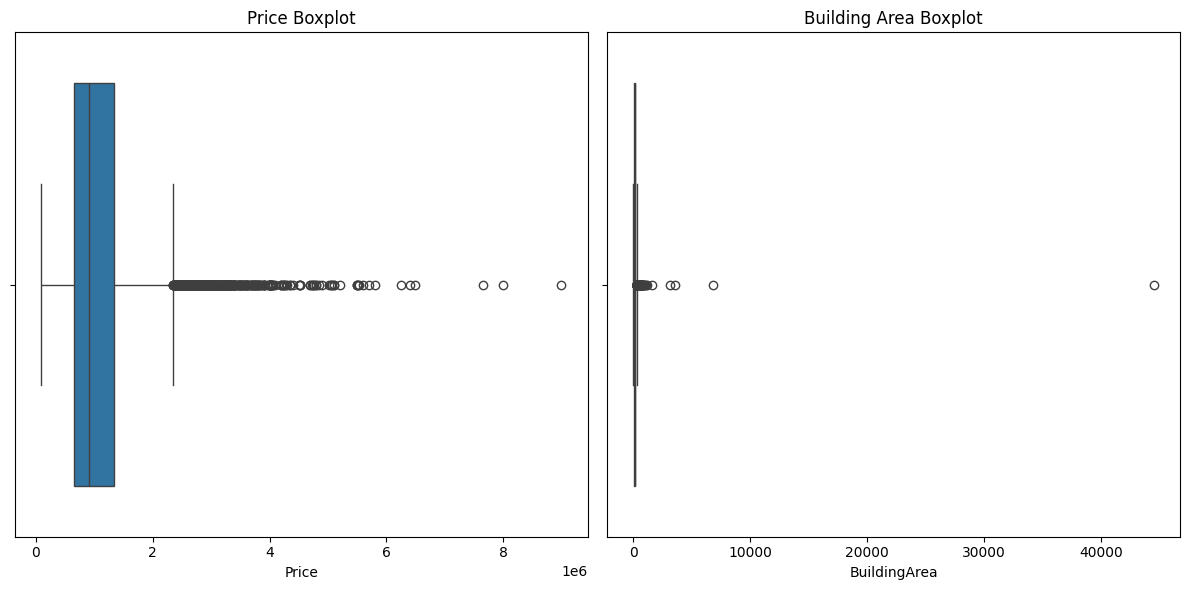

Price 이상치 개수: 232
BuildingArea 이상치 개수: 0

Price 이상치 샘플:
            Suburb         Address  Rooms Type Method   SellerG        Date  \
36         Balwyn  112 Belmore Rd      5    h     PI    Jellis  28/05/2016   
92   Balwyn North     19 Jacka St      4    h      S    Jellis   3/09/2016   
162           Kew   8 Bradford Av      4    h      S        RT   3/09/2017   
318           Kew     69 Malin St      5    h     PI  Marshall  27/11/2016   
399           Kew    23 Grange Rd      5    h      S     Caine  12/11/2016   

     Distance  Postcode  Bedroom2  ...  Landsize  BuildingArea  YearBuilt  \
36        9.7    3103.0       5.0  ...     715.0         420.0     2009.0   
92        9.2    3104.0       4.0  ...    1135.0         275.0     1960.0   
162       5.4    3101.0       4.0  ...     838.0           NaN        NaN   
318       5.6    3101.0       4.0  ...     480.0         147.0     1979.0   
399       5.6    3101.0       5.0  ...     957.0         400.0     1930.0   

     Counci

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 데이터 로드 (예시: melbourne_data.csv)
df = pd.read_csv('/data/ephemeral/home/Jungyeon/level4-cv-finalproject-hackathon-cv-02-lv3/AutoML/data/melb_split.csv')

df

# Boxplot을 사용하여 price와 buildingArea의 이상치 시각화
plt.figure(figsize=(12, 6))

# Price boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot')

# BuildingArea boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['BuildingArea'])
plt.title('Building Area Boxplot')

plt.tight_layout()
plt.show()

# Z-score를 사용하여 이상치 확인
z_scores_price = np.abs(stats.zscore(df['Price']))
z_scores_area = np.abs(stats.zscore(df['BuildingArea']))

# Z-score가 3 이상인 값은 이상치로 간주
price_outliers = df[z_scores_price > 3]
area_outliers = df[z_scores_area > 3]

print("Price 이상치 개수:", price_outliers.shape[0])
print("BuildingArea 이상치 개수:", area_outliers.shape[0])

# 이상치 출력
print("\nPrice 이상치 샘플:\n", price_outliers.head())
print("\nBuildingArea 이상치 샘플:\n", area_outliers.head())

Price 이상치 개수: 612
BuildingArea 이상치 개수: 353

Price 이상치 샘플:
           Suburb         Address  Rooms Type Method   SellerG        Date  \
36        Balwyn  112 Belmore Rd      5    h     PI    Jellis  28/05/2016   
46     Glen Iris   1 Maitland St      3    h      S    Jellis  17/09/2016   
54      St Kilda   20 Fawkner St      4    h      S  Marshall  23/09/2017   
64       Hampton    38 Myrtle Rd      4    h      S      Nick   3/09/2016   
92  Balwyn North     19 Jacka St      4    h      S    Jellis   3/09/2016   

    Distance  Postcode  Bedroom2  ...  Landsize  BuildingArea  YearBuilt  \
36       9.7    3103.0       5.0  ...     715.0         420.0     2009.0   
46       9.2    3146.0       4.0  ...     885.0         217.0     1910.0   
54       5.0    3182.0       4.0  ...     324.0         265.0     1890.0   
64      13.7    3188.0       3.0  ...     701.0         320.0     2015.0   
92       9.2    3104.0       4.0  ...    1135.0         275.0     1960.0   

    CouncilArea  Latt

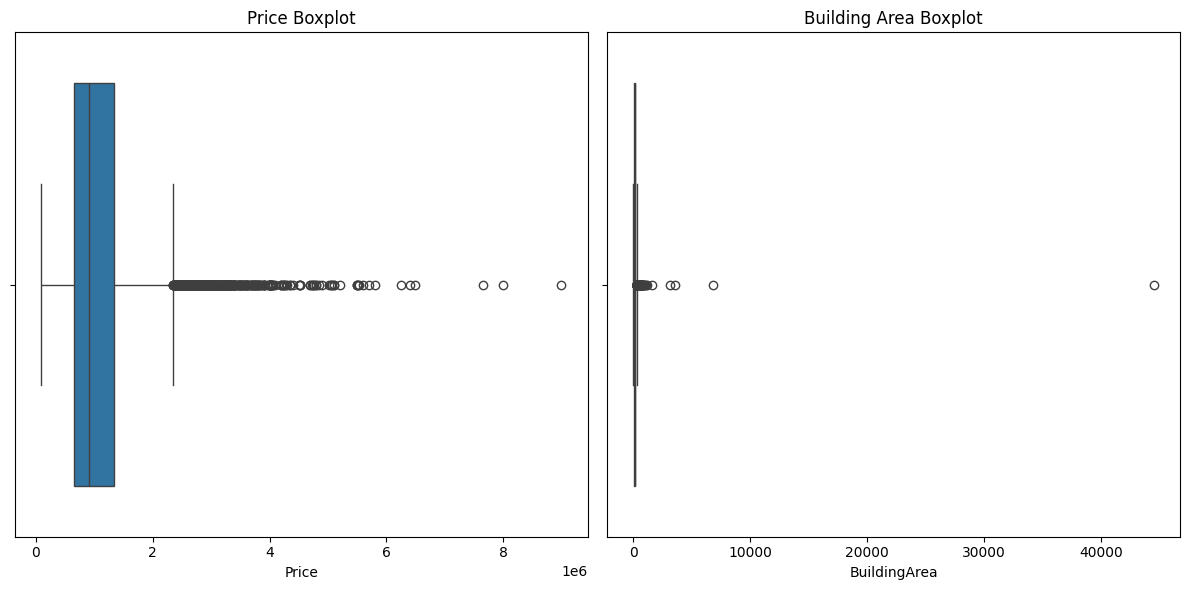

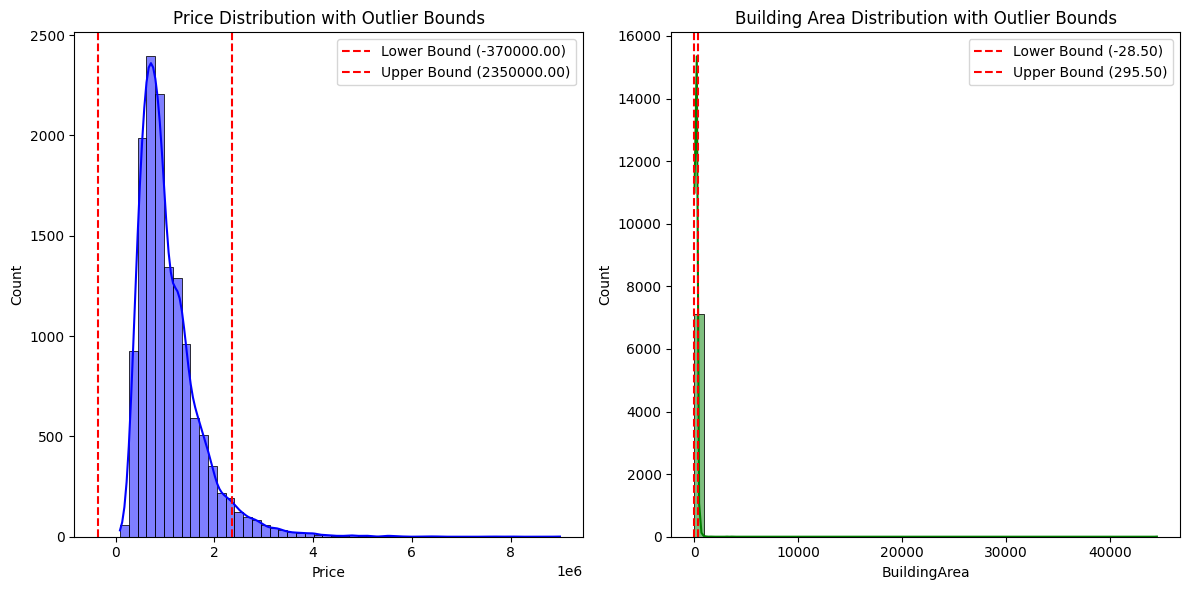


이상치 제거 후 데이터프레임 크기: (6558, 22)

이상치 제거 후 첫 5개 데이터:
       Suburb              Address  Rooms Type Method        SellerG  \
0   Brighton        18 Rooding St      3    h      S         Buxton   
1     Coburg        11 Station St      3    h      S           Brad   
3   Carnegie         4/5 Anzac St      2    u      S  hockingstuart   
6   Hawthorn  6/15 Shakespeare Gr      2    u      S         Jellis   
11  Sunshine           75 Duke St      3    h     SP            S&L   

          Date  Distance  Postcode  Bedroom2  ...  Landsize  BuildingArea  \
0    3/09/2016      11.2    3186.0       3.0  ...     366.0         156.0   
1   23/04/2016       7.8    3058.0       3.0  ...     238.0         131.0   
3    4/06/2016      11.4    3163.0       2.0  ...       0.0         100.0   
6    3/06/2017       5.3    3122.0       2.0  ...       0.0          84.0   
11  12/08/2017      10.5    3020.0       3.0  ...     485.0         130.0   

    YearBuilt  CouncilArea  Lattitude Longtitude         

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (예시: melbourne_data.csv)
df = pd.read_csv('/data/ephemeral/home/Jungyeon/level4-cv-finalproject-hackathon-cv-02-lv3/AutoML/data/melb_split.csv')

# Price의 IQR 계산
Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# BuildingArea의 IQR 계산
Q1_area = df['BuildingArea'].quantile(0.25)
Q3_area = df['BuildingArea'].quantile(0.75)
IQR_area = Q3_area - Q1_area

# 이상치 기준
price_lower_bound = Q1_price - 1.5 * IQR_price
price_upper_bound = Q3_price + 1.5 * IQR_price

area_lower_bound = Q1_area - 1.5 * IQR_area
area_upper_bound = Q3_area + 1.5 * IQR_area

# 이상치 확인
price_outliers = df[(df['Price'] < price_lower_bound) | (df['Price'] > price_upper_bound)]
area_outliers = df[(df['BuildingArea'] < area_lower_bound) | (df['BuildingArea'] > area_upper_bound)]

# 이상치 출력
print("Price 이상치 개수:", price_outliers.shape[0])
print("BuildingArea 이상치 개수:", area_outliers.shape[0])

print("\nPrice 이상치 샘플:\n", price_outliers.head())
print("\nBuildingArea 이상치 샘플:\n", area_outliers.head())

# 시각화 - Boxplot을 사용하여 이상치 시각화

plt.figure(figsize=(12, 6))

# Price boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot')

# BuildingArea boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['BuildingArea'])
plt.title('Building Area Boxplot')

plt.tight_layout()
plt.show()

# 시각화 - 이상치 범위 표시
plt.figure(figsize=(12, 6))

# Price의 이상치 범위 시각화
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, color='blue', bins=50)
plt.axvline(price_lower_bound, color='red', linestyle='--', label=f'Lower Bound ({price_lower_bound:.2f})')
plt.axvline(price_upper_bound, color='red', linestyle='--', label=f'Upper Bound ({price_upper_bound:.2f})')
plt.title('Price Distribution with Outlier Bounds')
plt.legend()

# BuildingArea의 이상치 범위 시각화
plt.subplot(1, 2, 2)
sns.histplot(df['BuildingArea'], kde=True, color='green', bins=50)
plt.axvline(area_lower_bound, color='red', linestyle='--', label=f'Lower Bound ({area_lower_bound:.2f})')
plt.axvline(area_upper_bound, color='red', linestyle='--', label=f'Upper Bound ({area_upper_bound:.2f})')
plt.title('Building Area Distribution with Outlier Bounds')
plt.legend()

plt.tight_layout()
plt.show()



# 이상치 제거 - 새로운 데이터프레임 생성
df_cleaned = df[(df['Price'] >= price_lower_bound) & (df['Price'] <= price_upper_bound) &
                (df['BuildingArea'] >= area_lower_bound) & (df['BuildingArea'] <= area_upper_bound)]

# 새로운 데이터프레임의 크기 출력
print("\n이상치 제거 후 데이터프레임 크기:", df_cleaned.shape)

# 제거된 이상치 데이터 확인
print("\n이상치 제거 후 첫 5개 데이터:\n", df_cleaned.head())

# df_cleaned를 새로운 CSV 파일로 저장
df_cleaned.to_csv('melb_split_cleaned.csv', index=False)
